# Hotel Bookings Analysis 

# Part 2 - EDA and Data Visualisation

<b> Project Objetive: </b>

The objective of this project is to answer the following 3 questions for each hotel of the dataset:
* What is the seasonality for each hotel and what are the top performing months?
* What are the top countries in terms of bookings and/or revenue?
* What´s the most frequent guest type for each hotel? 

Also:
* Explore the use of Python for data analysis in the hospitality industry



<b> Data Source: </b>

The dataset used in this project can be found on Kaggle under the following link:

https://www.kaggle.com/jessemostipak/hotel-booking-demand


<b> About the dataset: </b> 

* This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
* Includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. A total of 32 variables.
* All personally identifying information has been removed from the data.
* Both hotels are assumed to be located in Portugal, however their exact location and name are unknown.
* The dataset contains a total of 119390 entries.


<b> Table of contents: </b>
1. Importing the libraries and custom functions needed and uploading the dataset
2. Overview of dataset volume: city hotel vs. resort hotel 
3. Separating the dataframe by hotel type and market 
4. Booking and ADR (average daily rate) overview
   * Number of bookings over 2016: city hotel vs. resort hotel - all countries  
   * ADR over 2016: city hotel vs. resort hotel - all countries 
5. Booking seasonality
   * City hotel - Booking volume over 2016
   * City hotel - Booking volume vs. ADR over 2016 
   * Resort hotel - Booking volume over 2016
   * Resort hotel - Booking volume vs. ADR over 2016 
6. ALOS 
   * ALOS over 2016: city hotel vs. resort hotel - all countries and by markets 
   * City hotel - booking volume vs. ALOS 
   * Resort hotel - booking volume vs. ALOS 
7. Room Nights & Revenue
   * Volume of room nights over 2016: city hotel vs. resort hotel - all countries 
   * Monthly revenue over 2016 - city hotel vs. resort hotel 
   * Revenue by country -  city hotel vs. resort hotel 
   * City hotel - Room Nights vs. Revenue - Local vs. International 
   * Resort hotel - Room Nights & Revenue - Local vs. International
8. Feeder Markets
   * Adding domestic / international variable to the dataframe 
   * Customer origin: domestic & international guests: city hotel vs. resort hotel
   * Customer origin - city hotel 
   * Customer origin - resort hotel 
   * Top feeder countries by hotel type 
   * Avg. RPB (Revenue per booking) per origin 
   * City hotel - booking volume vs. avg. RPB
   * Resort hotel - booking volume vs. avg. RPB
9. Customer Type
   * Creating customer type variable - single / couple / group / family 
   * Most frequent and most profitable customer within the top 20 countries
   * Avg. RPB per customer type - city hotel
   * Avg. RPB per customer type - resort hotel
   * Customer types characteristics overview - city hotel
   * Customer types characteristics overview - resort hotel
10. Other observations

# <b> 1. Importing the libraries and custom functions needed and uploading the dataset </b>

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

    
# import functions doc
import sys  
sys.path.insert(0, "../_functions_2")
from Functions_EDA import *
from functions_plot_EDA import *

In [2]:
#import file 
file_path = "data_bookings_clean.csv"
data_all = pd.read_csv(file_path)
data_all = data_all.reset_index(drop=True)
data_all = data_all.drop('Unnamed: 0', 1)

In [3]:
# select data for 2016 only
df_16 = data_all[data_all.arrival_date_year == 2016].reset_index()
df_16.drop(columns=['index'], inplace = True)

# <b> 2. Overview of dataset volume: city hotel vs. resort hotel </b>

In [4]:
#Basic info about the dataset:

# size after cleaning: 33254 rows
print(df_16.shape)

# only checked-out booking
# only 2016
# 2 hotels in Portugal - city hotel & resort hotel (exact location unknown)


(33254, 33)


In [5]:
colors2 = ['#81B19B','#2a6f97' ]

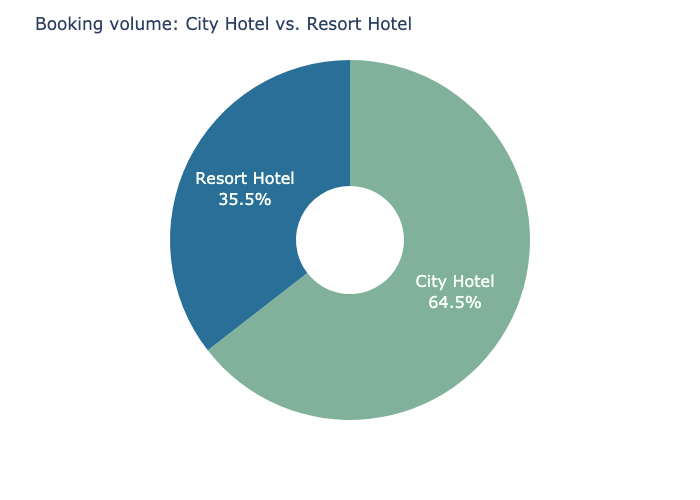

In [6]:
# number of bookings: city vs resort  - pie chart

fig = px.pie(df_16, values='booking',
             names='hotel',
             color = "hotel",
                color_discrete_map={'City Hotel':'#81B19B',
                                 'Resort Hotel':'#2a6f97'
                                },
            hole=.3)


# Styling 
fig.update(layout_title_text='Booking volume: City Hotel vs. Resort Hotel', layout_showlegend=False)
fig.update_traces(textinfo='percent+label', textposition='inside',
                  textfont_size=16, textfont = {'color': "#f7fff7"})
                  

fig.show("png")


# <b> 3. Separating the dataframe by hotel type and market </b> 

In [7]:
# separating df by hotel type to carry out comparisons

df_resort = df_16[df_16["hotel"] == 'Resort Hotel']
df_city = df_16[df_16["hotel"] == 'City Hotel']
print(df_resort.shape)
print(df_city.shape)

(11805, 33)
(21449, 33)


In [8]:
# separating df by market - local vs. international

city_local = df_city[df_city["country_name"] == 'Portugal']
city_int = df_city[df_city["country_name"] != 'Portugal']

resort_local = df_resort[df_resort["country_name"] == 'Portugal']
resort_int = df_resort[df_resort["country_name"] != 'Portugal']

In [9]:
# city hotel: booking volume - local vs. international

city_local_book = city_local.groupby("arrival_date_month")["booking"].count().reset_index()
city_int_book = city_int.groupby("arrival_date_month")["booking"].count().reset_index()

city_local_book.columns = ['month','city_local_book']
city_int_book.columns = ['month','city_int_book']

city_traffic = city_local_book.merge(city_int_book,on='month')
city_traffic = Sort_Dataframeby_Month(df=city_traffic,monthcolumnname='month')
city_traffic.round(1)

,month,city_local_book,city_int_book
0,January,299,578
1,February,456,926
2,March,481,1390
3,April,496,1463
4,May,504,1613
5,June,615,1520
6,July,480,1503
7,August,206,1771
8,September,348,1783
9,October,250,1770


In [10]:
# resort hotel: booking volume - local vs. international

resort_local_book = resort_local.groupby("arrival_date_month")["booking"].count().reset_index()
resort_int_book = resort_int.groupby("arrival_date_month")["booking"].count().reset_index()

resort_local_book.columns = ['month','resort_local_book']
resort_int_book.columns = ['month','resort_int_book']

resort_traffic = resort_local_book.merge(resort_int_book,on='month')

resort_traffic = Sort_Dataframeby_Month(df=resort_traffic,monthcolumnname='month')
resort_traffic.round(1)

,month,resort_local_book,resort_int_book
0,January,303,283
1,February,463,441
2,March,493,678
3,April,432,846
4,May,281,970
5,June,204,741
6,July,262,611
7,August,301,485
8,September,202,773
9,October,282,949


# 4. Bookings and ADR (average daily rate) overview

 <b> a) Number of bookings over 2016: city hotel vs. resort hotel - all countries </b>

In [11]:
# grouping booking volume by hotel type

city_booking = df_city.groupby("arrival_date_month")["booking"].count().reset_index()
resort_booking = df_resort.groupby("arrival_date_month")["booking"].count().reset_index()


booking_volume = city_booking.merge(resort_booking,on='arrival_date_month')
booking_volume.columns = ['month','bookings_city','bookings_resort']
booking_volume = Sort_Dataframeby_Month(df=booking_volume,monthcolumnname='month')
booking_volume.round(1)

,month,bookings_city,bookings_resort
0,January,877,586
1,February,1382,904
2,March,1871,1171
3,April,1959,1278
4,May,2117,1251
5,June,2135,945
6,July,1983,873
7,August,1977,786
8,September,2131,975
9,October,2020,1231


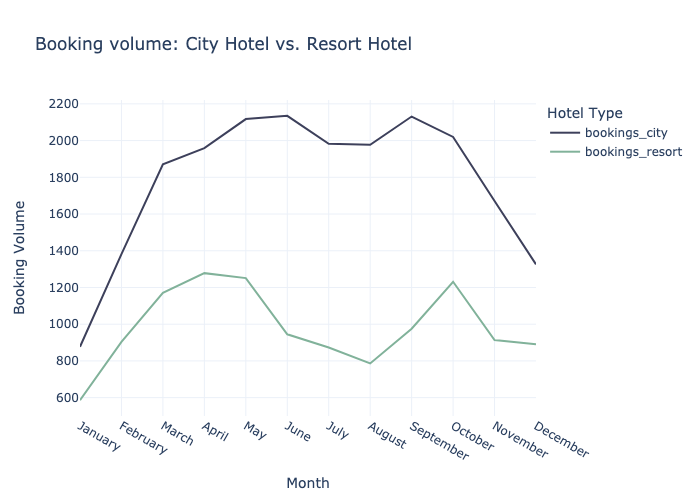

In [12]:
# seasonality by month - city vs. resort

fig = px.line(booking_volume, x='month',y=["bookings_city", "bookings_resort"], 
        title='Booking volume: City Hotel vs. Resort Hotel',
       labels={
                     "value": "Booking Volume",
                     "month": "Month",
                     "variable": "Hotel Type"},
        template = 'plotly_white',
        color_discrete_map={
                 "bookings_city": "#3d405b",
                 "bookings_resort": "#81b29a"
             }
                   )

fig.show("png")

<b> b) ADR over 2016: city hotel vs. resort hotel - all countries  </b>

In [13]:
# mean adr per month per hotel (2016)

data_city_adr = df_city.groupby("arrival_date_month")["adr"].mean().reset_index()
data_resort_adr = df_resort.groupby("arrival_date_month")["adr"].mean().reset_index()

data_city_adr.columns = ['month','avg_adr_city']
data_resort_adr.columns = ['month', 'avg_adr_resort']

data_adr = data_city_adr.merge(data_resort_adr,on='month')

data_adr = Sort_Dataframeby_Month(df=data_adr,monthcolumnname='month')
data_adr.round(2)

,month,avg_adr_city,avg_adr_resort
0,January,78.98,51.46
1,February,84.33,57.59
2,March,88.69,62.14
3,April,100.12,69.71
4,May,109.88,73.59
5,June,107.62,100.73
6,July,113.51,148.39
7,August,118.25,166.66
8,September,119.64,106.22
9,October,111.55,69.58


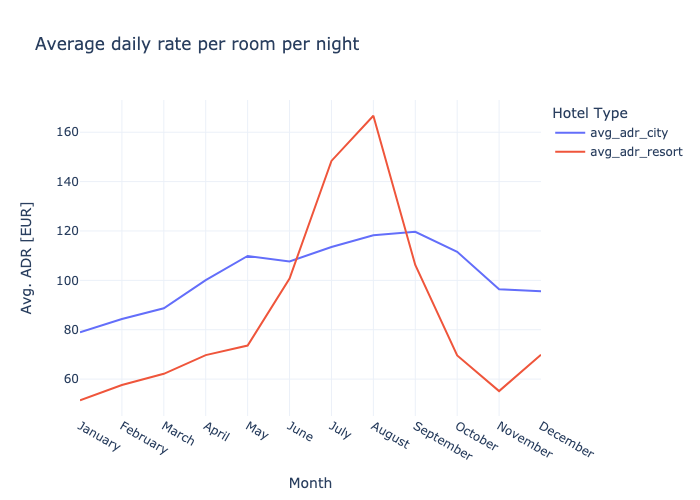

In [14]:
fig = px.line(data_adr, x='month', y=['avg_adr_city','avg_adr_resort'] ,
        title='Average daily rate per room per night',
        labels={
                     "value": "Avg. ADR [EUR]",
                     "month": "Month",
                     "variable": "Hotel Type"},  template = 'plotly_white'
       )

fig.show("png")

# <b> 5. Booking seasonality </b>

<b> a) City hotel - Booking volume over 2016 </b>

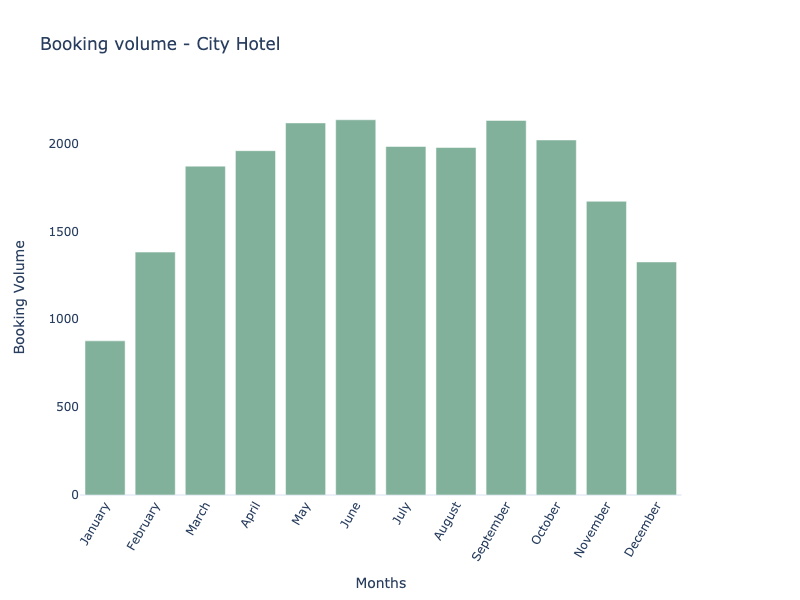

In [15]:
# city hotel - booking volume over 2016

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_city"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)

# Add figure title
fig.update_layout(
    title_text="Booking volume per customer origin & avg. ADR for City Hotel"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.update_layout(height = 600, width = 800, 
    title = "Booking volume - City Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)
fig.show("png")

<b> b) City hotel - Booking volume vs. ADR over 2016 </b>

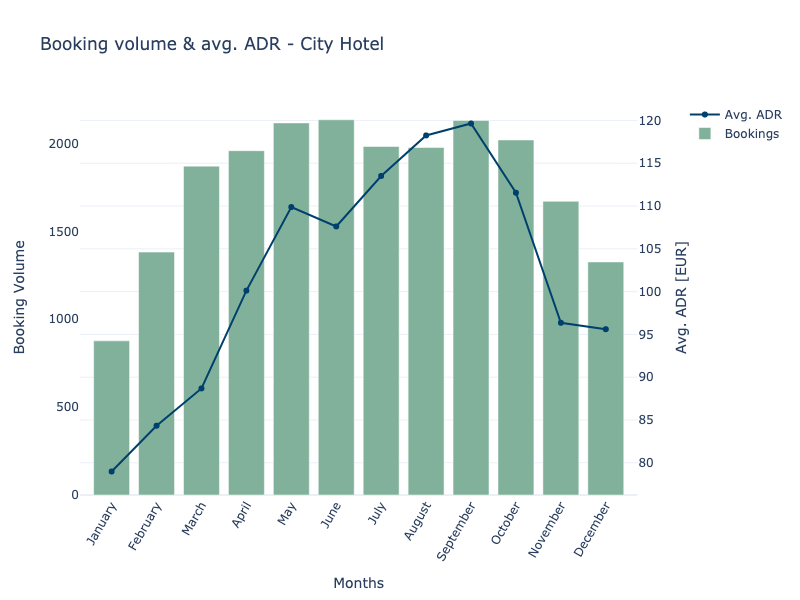

In [16]:
# city hotel - booking volume vs. ADR

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_city"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)


trace2 = go.Scatter(
    x = data_adr["month"],
    y = data_adr['avg_adr_city'],
    name='Avg. ADR',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#00406c")
)



# Add figure title
fig.update_layout(
    title_text="Booking volume per customer origin & avg. ADR for City Hotel"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.update_layout(height = 600, width = 800, 
    title = "Booking volume & avg. ADR - City Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="Avg. ADR [EUR]", secondary_y=True, showgrid=True)

fig.show("png")

<b> c) Resort hotel - Booking volume over 2016 </b>

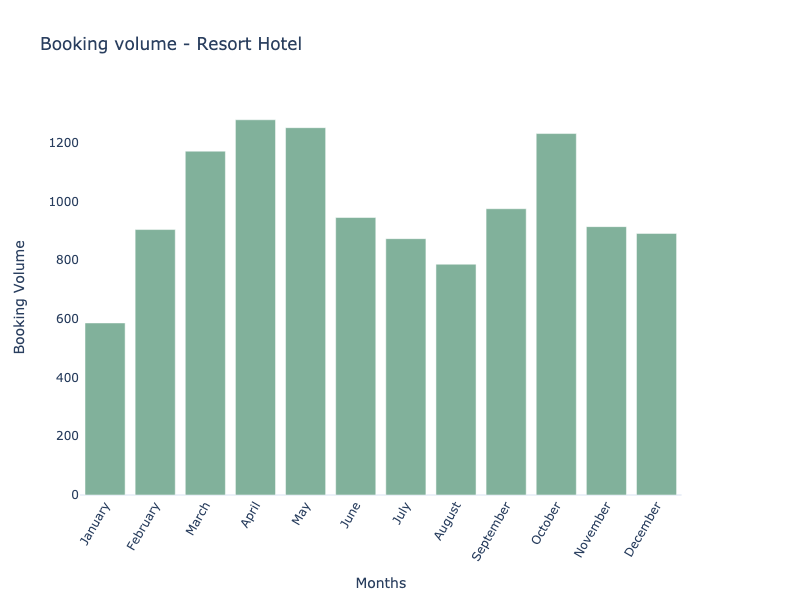

In [17]:
# resort hotel - booking volume over 2016

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_resort"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)


# Add figure title
fig.update_layout(
    title_text="Booking volume per customer origin & avg. ADR for Resort Hotel"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.update_layout(height = 600, width = 800, 
    title = "Booking volume - Resort Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)

fig.show("png")

<b> d) Resort hotel - Booking volume vs. ADR over 2016 </b>

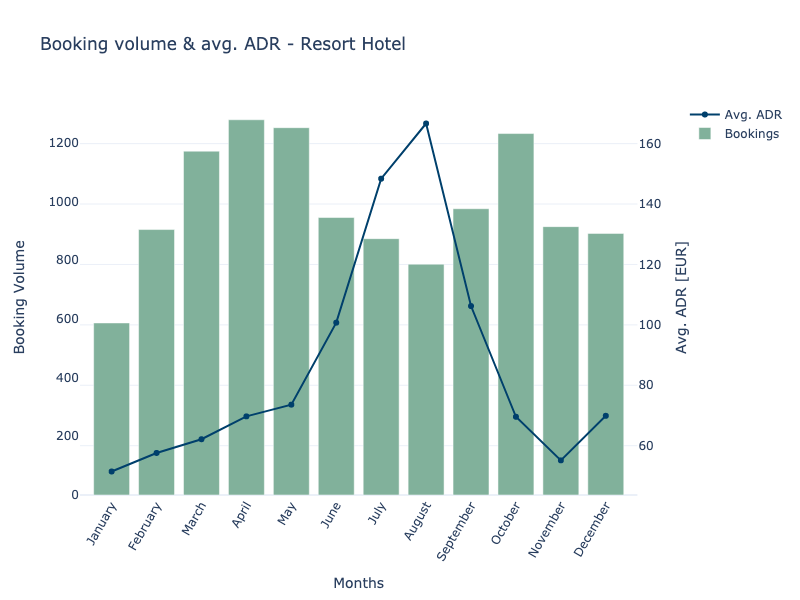

In [18]:
# resort hotel - booking volume vs. ADR

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_resort"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)


trace2 = go.Scatter(
    x = data_adr["month"],
    y = data_adr['avg_adr_resort'],
    name='Avg. ADR',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#00406c")
)



# Add figure title
fig.update_layout(
    title_text="Booking volume per customer origin & avg. ADR for Resort Hotel"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.update_layout(height = 600, width = 800, 
    title = "Booking volume & avg. ADR - Resort Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="Avg. ADR [EUR]", secondary_y=True, showgrid=True)

fig.show("png")

# 6. ALOS

<b> a) ALOS over 2016: city hotel vs. resort hotel - all countries and by markets </b>

In [19]:
# ALOS city vs. hotel (domestic + int)

city_alos = df_city.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()

resort_alos = df_resort.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()

alos = city_alos.merge(resort_alos,on='arrival_date_month')
alos.columns = ['month','alos_city','alos_resort']
alos = Sort_Dataframeby_Month(df=alos,monthcolumnname='month')
alos.round(1)

,month,alos_city,alos_resort
0,January,2.5,2.6
1,February,2.7,2.8
2,March,3.0,3.3
3,April,2.9,3.6
4,May,2.9,4.2
5,June,2.7,5.8
6,July,3.2,5.5
7,August,3.2,5.4
8,September,2.8,5.0
9,October,2.9,3.8


In [20]:
# ALOS city - domestic vs international

city_alos_local = city_local.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()
city_alos_int = city_int.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()

alos_city = city_alos_local.merge(city_alos_int,on='arrival_date_month')
alos_city.columns = ['month','alos_city_local','alos_city_int']
alos_city = Sort_Dataframeby_Month(df=alos_city,monthcolumnname='month')
alos_city.round(1)

,month,alos_city_local,alos_city_int
0,January,2.0,2.8
1,February,2.0,3.1
2,March,2.3,3.3
3,April,2.2,3.1
4,May,2.3,3.0
5,June,2.4,2.8
6,July,2.7,3.4
7,August,2.8,3.3
8,September,2.1,3.0
9,October,1.9,3.1


In [21]:
# ALOS resort - domestic vs international

resort_alos_local = resort_local.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()
resort_alos_int = resort_int.groupby("arrival_date_month")["length_of_stay"].mean().reset_index()

alos_resort = resort_alos_local.merge(resort_alos_int,on='arrival_date_month')
alos_resort.columns = ['month','alos_resort_local','alos_resort_int']
alos_resort = Sort_Dataframeby_Month(df=alos_resort,monthcolumnname='month')
alos_resort.round(1)

,month,alos_resort_local,alos_resort_int
0,January,1.7,3.5
1,February,2.0,3.7
2,March,2.1,4.1
3,April,2.3,4.3
4,May,2.3,4.8
5,June,3.5,6.4
6,July,4.5,5.9
7,August,5.0,5.7
8,September,3.1,5.5
9,October,2.0,4.4


In [22]:
alos_all = alos_city.merge(alos_resort, on = 'month')
#alos_all.round(1)

<b> b) City hotel - Booking volume vs. ALOS </b>

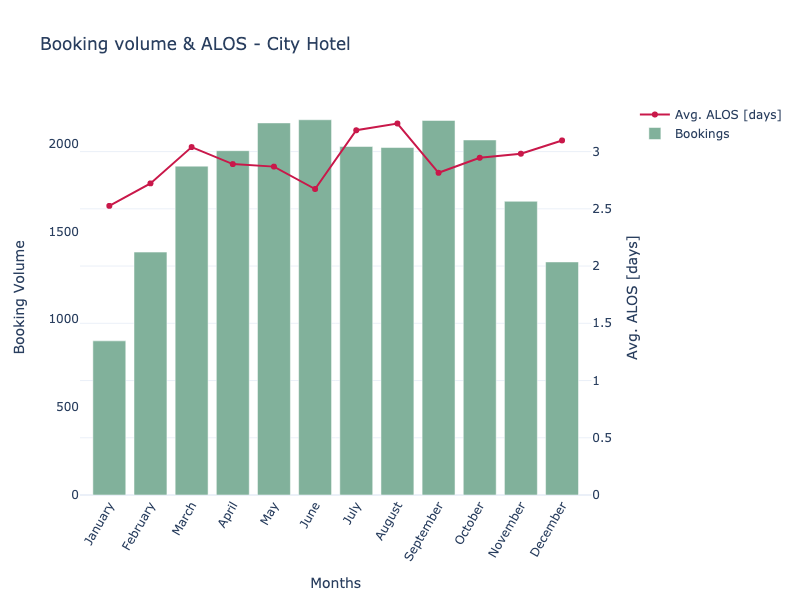

In [23]:
# city hotel - booking volume vs. ALOS

fig = make_subplots(specs=[[{"secondary_y": True}]])

trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_city"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)


trace2 = go.Scatter(
    x = alos["month"],
    y = alos['alos_city'],
    name='Avg. ALOS [days]',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#c9184a")
  
)


fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.update_layout(height = 600, width = 800, 
    title = "Booking volume & ALOS - City Hotel" ,xaxis=dict(
      tickangle=-60,
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="Avg. ALOS [days]", secondary_y=True,showgrid=True)
fig.update_yaxes(rangemode="tozero")


fig.show("png")

<b> c) Resort hotel - Booking volume vs. ALOS </b>

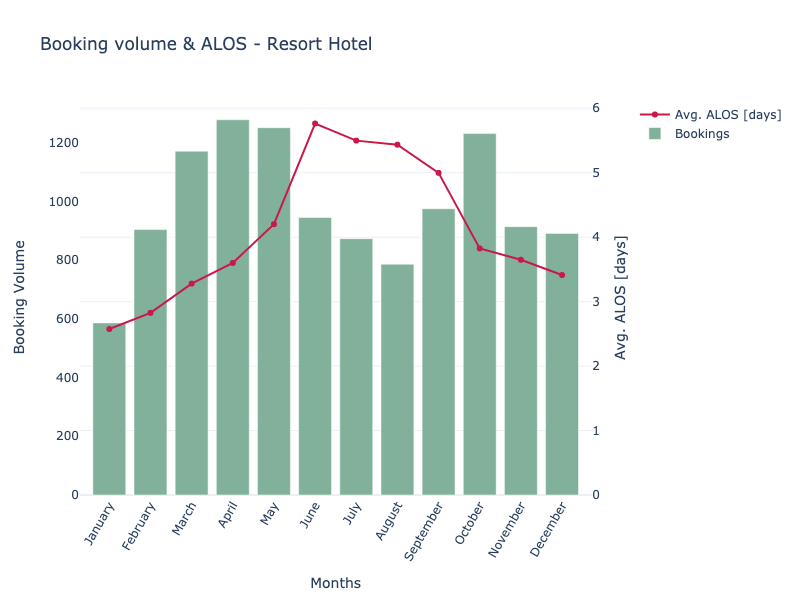

In [24]:
# resort hotel - booking volume (domestic + international) vs. ALOS
fig2 = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = booking_volume["month"],
    y = booking_volume["bookings_resort"],
    name = "Bookings",
    marker = dict(
        color="#81B19B"
               )
)


trace2 = go.Scatter(
    x = alos["month"],
    y = alos['alos_resort'],
    name='Avg. ALOS [days]',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#c9184a")
  
)


fig2.add_trace(trace1)
fig2.add_trace(trace2,secondary_y=True)
fig2.update_layout(height = 600, width = 800, title = "Booking volume & ALOS - Resort Hotel" ,xaxis=dict(
      tickangle=-60
    ), template = 'plotly_white')

# Change the bar mode
fig2.update_layout(barmode='stack')

# Set x-axis title
fig2.update_xaxes(title_text="Months")

# Set y-axes titles
fig2.update_yaxes(title_text="Booking Volume", secondary_y=False, showgrid=False)
fig2.update_yaxes(title_text="Avg. ALOS [days]", secondary_y=True, showgrid=True)
fig2.update_yaxes(rangemode="tozero")


fig2.show("png")

# <b> 7. Room Nights & Revenue </b>


 <b> a) Volume of room nights over 2016: city hotel vs. resort hotel - all countries </b>

In [25]:
# grouping room nights number by hotel type

city_RN = df_city.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()
resort_RN = df_resort.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()


RN_volume = city_RN.merge(resort_RN,on='arrival_date_month')
RN_volume.columns = ['month','RN City Hotel','RN Resort Hotel']
RN_volume = Sort_Dataframeby_Month(df=RN_volume,monthcolumnname='month')
RN_volume.round(1)

,month,RN City Hotel,RN Resort Hotel
0,January,2215,1509
1,February,3762,2555
2,March,5687,3841
3,April,5663,4601
4,May,6073,5257
5,June,5707,5447
6,July,6318,4800
7,August,6416,4272
8,September,5998,4873
9,October,5951,4709


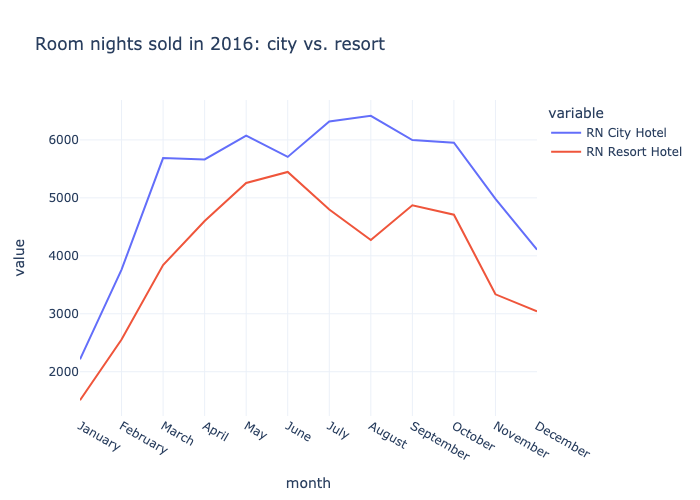

In [26]:
# RN sold by month - city vs. resort

fig = px.line(RN_volume, x='month',y=["RN City Hotel", "RN Resort Hotel"],
        title='Room nights sold in 2016: city vs. resort',
        template = 'plotly_white')

fig.show("png")

<b> b) Monthly revenue over 2016 - city hotel vs. resort hotel </b>

In [27]:
# revenue per month 2016 - city vs. resort

resort_revenue = df_resort.groupby("arrival_date_month")["booking_value"].sum().reset_index()
city_revenue = df_city.groupby("arrival_date_month")["booking_value"].sum().reset_index()

df_revenue = city_revenue.merge(resort_revenue, on ='arrival_date_month')
df_revenue.columns = ["month","monthly_revenue_city", "monthly_revenue_resort"]
df_revenue = Sort_Dataframeby_Month(df = df_revenue,monthcolumnname ='month')
df_revenue.round(1)

,month,monthly_revenue_city,monthly_revenue_resort
0,January,174002.4,77679.8
1,February,314291.2,147864.4
2,March,496833.0,242382.8
3,April,563972.8,315226.8
4,May,665434.6,376704.3
5,June,616249.4,501886.1
6,July,706487.8,672551.5
7,August,742210.0,674561.1
8,September,711890.6,474678.4
9,October,657195.7,326893.6


<b> c) Revenue by country -  city hotel vs. resort hotel </b>

In [28]:
df_city_rev = df_city.groupby("country_name")["booking_value"].sum().reset_index()
df_resort_rev = df_resort.groupby("country_name")["booking_value"].sum().reset_index()


df_rev = df_city_rev.merge(df_resort_rev, on ='country_name')
df_rev.columns = ["country","rev_city", "rev_resort"]

df_rev.head()

,country,rev_city,rev_resort
0,Albania,696.00,105.45
1,Algeria,11257.41,1230.80
2,Angola,17279.71,2612.00
3,Argentina,16410.57,5609.96
4,Armenia,521.40,387.10


In [29]:
df_revenue.monthly_revenue_city.sum()

6523845.59

<b> d) City hotel - Room Nights vs. Revenue - Local vs. International </b>

In [30]:
# ROOM NIGHTS - City Hotel - Local vs. International

city_local_RN = city_local.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()
city_int_RN = city_int.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()

city_local_RN.columns = ['month','city_local_RN']
city_int_RN.columns = ['month','city_int_RN']

city_RN = city_local_RN.merge(city_int_RN,on='month')

city_RN = Sort_Dataframeby_Month(df=city_RN,monthcolumnname='month')
city_RN.round(1)

,month,city_local_RN,city_int_RN
0,January,608,1607
1,February,927,2835
2,March,1119,4568
3,April,1087,4576
4,May,1177,4896
5,June,1490,4217
6,July,1273,5045
7,August,579,5837
8,September,733,5265
9,October,482,5469


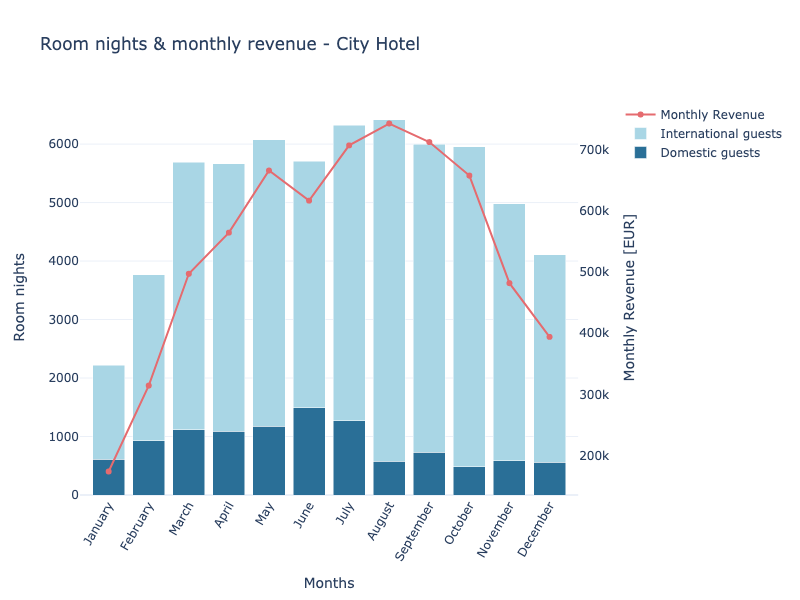

In [31]:
# city hotel - ROOM NIGHTS local vs. international vs. monthly revenue

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = city_RN["month"],
    y = city_RN["city_local_RN"],
    name = "Domestic guests",
    marker = dict(
        color="#2a6f97"
               )
)


trace2 = go.Bar(
    x = city_RN["month"],
    y = city_RN["city_int_RN"],
    name = "International guests",
    marker = dict(
        color="#a9d6e5"
               )
)


trace3 = go.Scatter(
    x = df_revenue["month"],
    y = df_revenue['monthly_revenue_city'],
    name='Monthly Revenue',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#e56b6f")
)



fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3,secondary_y=True)
fig.update_layout(height = 600, width = 800, 
    title = "Room nights & monthly revenue - City Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white' )


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Room nights", secondary_y=False, showgrid=True)
fig.update_yaxes(title_text="Monthly Revenue [EUR]", secondary_y=True, showgrid=False)

fig.show("png")

<b> e) Resort hotel - Room Nights & Revenue - Local vs. International </b>

In [32]:
# ROOM NIGHTS - Resort Hotel - Local vs. International

resort_local_RN = resort_local.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()
resort_int_RN = resort_int.groupby("arrival_date_month")["length_of_stay"].sum().reset_index()


resort_local_RN.columns = ['month','resort_local_RN']
resort_int_RN.columns = ['month','resort_int_RN']

resort_RN = resort_local_RN.merge(resort_int_RN,on='month')

resort_RN = Sort_Dataframeby_Month(df=resort_RN,monthcolumnname='month')
#resort_RN.round(1)

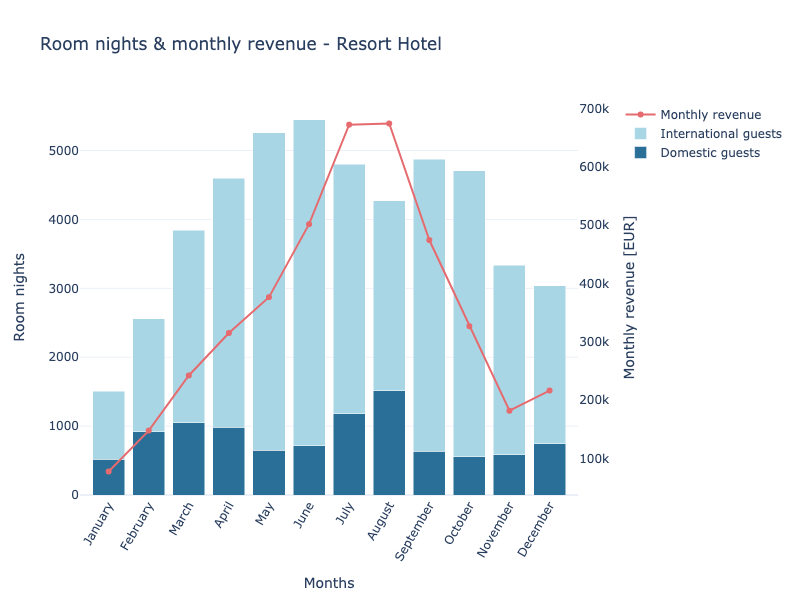

In [33]:
# resort hotel - ROOM NIGHTS

fig = make_subplots(specs=[[{"secondary_y": True}]])


trace1 = go.Bar(
    x = resort_RN["month"],
    y = resort_RN["resort_local_RN"],
    name = "Domestic guests",
    marker = dict(
        color="#2a6f97"
               )
)


trace2 = go.Bar(
    x = resort_RN["month"],
    y = resort_RN["resort_int_RN"],
    name = "International guests",
    marker = dict(
        color="#a9d6e5"
               )
)


trace3 = go.Scatter(
    x = df_revenue["month"],
    y = df_revenue['monthly_revenue_resort'],
    name='Monthly revenue',
    yaxis='y2',
    line_shape='linear',
    line=dict(color="#e56b6f")
)


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3,secondary_y=True)
fig.update_layout(height = 600, width = 800, 
    title = "Room nights & monthly revenue - Resort Hotel" ,xaxis=dict(
      tickangle=-60
    ),  template = 'plotly_white')


# Change the bar mode
fig.update_layout(barmode='stack')

# Set x-axis title
fig.update_xaxes(title_text="Months")

# Set y-axes titles
fig.update_yaxes(title_text="Room nights", secondary_y=False, showgrid=True)
fig.update_yaxes(title_text="Monthly revenue [EUR]", secondary_y=True, showgrid=False)

fig.show("png")

# 8. Feeder Markets

<b> a) Adding domestic / international variable to the dataframe </b>

In [34]:
# adding domestic / international variable to the df
conditions = [(df_city["country_name"] == 'Portugal'), (df_city["country_name"] != 'Portugal')]
values = ["Domestic", "International"]

df_city['customer_origin'] = np.select(conditions, values)
print(df_city['customer_origin'].value_counts())


conditions = [(df_resort["country_name"] == 'Portugal'), (df_resort["country_name"] != 'Portugal')]
values = ["Domestic", "International"]

df_resort['customer_origin'] = np.select(conditions, values)
print(df_resort['customer_origin'].value_counts())

International    16762
Domestic          4687
Name: customer_origin, dtype: int64
International    7939
Domestic         3866
Name: customer_origin, dtype: int64


In [35]:
# create df for domestic / international customers of each hotel
city_local = df_city[df_city["customer_origin"] == 'Domestic']
city_int = df_city[df_city["customer_origin"] == 'International']

resort_local = df_resort[df_resort["customer_origin"] == 'Domestic']
resort_int = df_resort[df_resort["customer_origin"] == 'International']

In [36]:
df_16_2 = pd.concat([df_city, df_resort], axis=0)
df_16_2.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'country_name', 'continent', 'sub_region',
       'arrival_date_month_num', 'checkin_date', 'length_of_stay',
       'lead_time_days', 'booking_date', 'booking_month_year',
       'booking_weekday', 'month-week', 'checkin_week_year',
       'checkin_month_year', 'booking_value', 'booking', 'customer_origin'],
      dtype='object')

In [37]:
print(f"City Local: {city_local.shape}")
print(f"City Int: {city_int.shape}")
print(f"Resort Local: {resort_local.shape}")
print(f"City Int: {resort_int.shape}")

City Local: (4687, 34)
City Int: (16762, 34)
Resort Local: (3866, 34)
City Int: (7939, 34)


<b> b) Customer origin: domestic & international guests: city hotel vs. resort hotel </b>

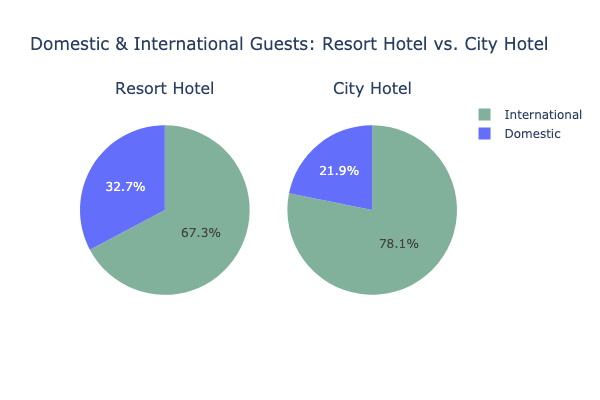

In [38]:
# pie chart to show % of domestic vs international guests for each hotel

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles = ('Resort Hotel',
                                    'City Hotel'
                                   ))

# Resort

labels = df_resort['customer_origin'].tolist()
values = df_resort['booking'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Resort"),
                    1, 1)

# City
labels = df_city['customer_origin'].tolist()
values = df_city['booking'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="City"),
                    1, 2)

fig.update_traces(textposition='inside', marker=dict(colors=['#81B19B', '#2a6f97']))

fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=400, width=600, title='Domestic & International Guests: Resort Hotel vs. City Hotel', boxmode='group')
fig.show("png")

<b> c) Customer origin - city hotel </b>

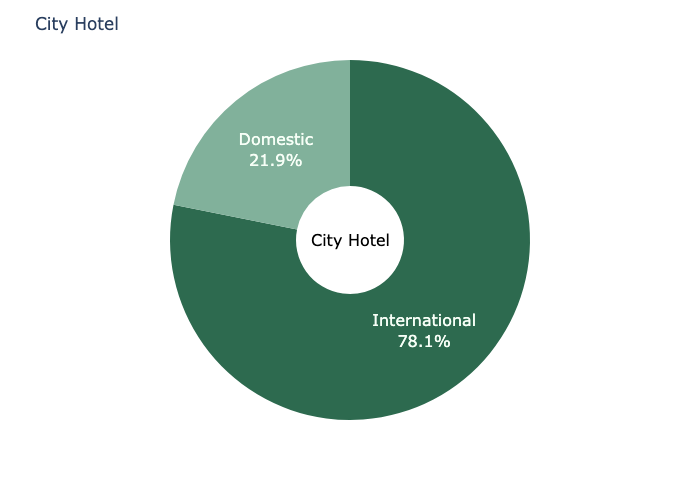

In [39]:
# num CITY booking - pie chart

fig = px.pie(df_city, values='booking',
             names = 'customer_origin',
             color = "customer_origin",
                color_discrete_map={'Domestic':'#81B19B',
                                 'International':'#2d6a4f'
                                },
            hole=.3)


# Styling 
fig.update(layout_title_text="City Hotel", layout_showlegend=False)
fig.update_traces(textinfo='percent+label', textposition='inside',
                  textfont_size=16, textfont = {'color': "#f7fff7"})
                  
fig.add_annotation(x= 0.5, y = 0.5,
                    text = 'City Hotel',
                    font = dict(size=16,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig.show("png")


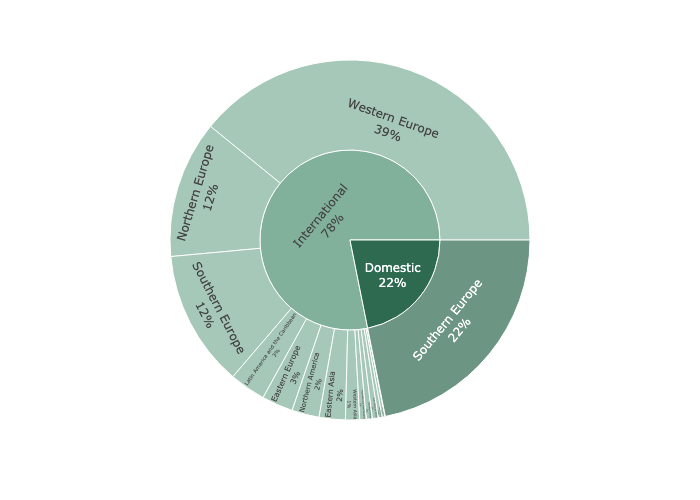

In [40]:
# city hotel - customer origin by geo region
df = px.data.tips()
fig = px.sunburst(df_city, path=['customer_origin', 'sub_region'],
                  values='booking', color='customer_origin',
                    color_discrete_map={'Domestic':'#2d6a4f', 'International':'#81B19B'}
            
                  )
fig.update_traces(textinfo="percent entry + label")
fig.show("png")

<b> d) Customer origin - resort hotel </b>

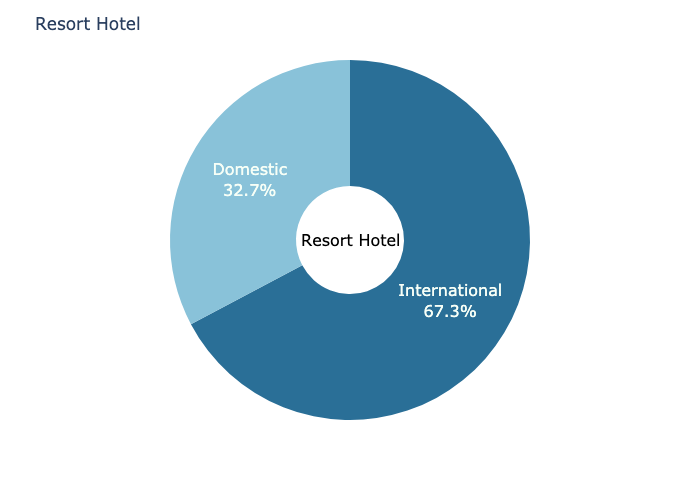

In [41]:
# num of resort booking - pie chart

fig = px.pie(df_resort, values='booking',
             names = 'customer_origin',
             color = "customer_origin",
                color_discrete_map={'Domestic':'#89c2d9',
                                 'International':'#2a6f97'
                                },
            hole=.3)


# Styling 
fig.update(layout_title_text="Resort Hotel", layout_showlegend=False)
fig.update_traces(textinfo='percent+label', textposition='inside',
                  textfont_size=16, textfont = {'color': "#f7fff7"})
                  
fig.add_annotation(x= 0.5, y = 0.5,
                    text = 'Resort Hotel',
                    font = dict(size=16,family='Verdana', 
                                color='black'),
                    showarrow = False)

fig.show("png")


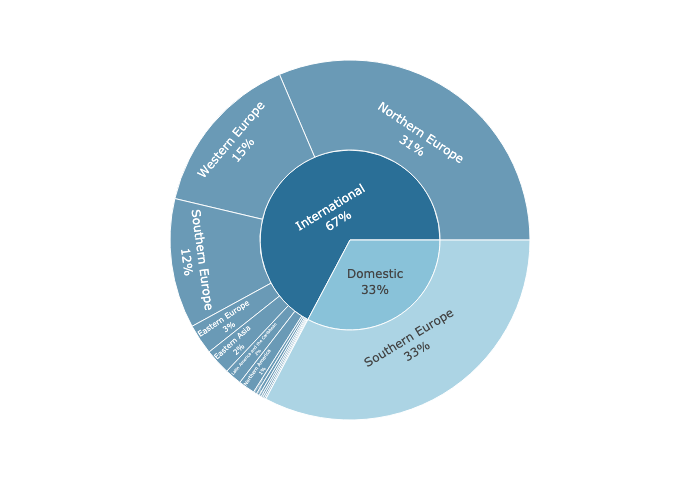

In [42]:
# resort hotel - customer origin by geo region
df = px.data.tips()
fig = px.sunburst(df_resort, path=['customer_origin', 'sub_region'],
                  values='booking', color='customer_origin',
                    color_discrete_map={'Domestic':'#89c2d9', 'International':'#2a6f97'}
            
                  )
fig.update_traces(textinfo="percent entry + label")
fig.show("png")

<b> e) Top feeder countries by hotel type </b>

In [43]:
# num of unique countries - CITY
print(f"Num countries CITY: {city_int.country.nunique()}")

# num of unique countries - RESORT
print(f"Num countries RESORT: {resort_int.country.nunique()}")

Num countries CITY: 121
Num countries RESORT: 91


In [44]:
# feeder countries for city hotel
city_int20 = city_int.groupby("country_name")["booking"].count().reset_index().sort_values(['booking'], ascending=False).head(20)
city_int20_list = city_int20['country_name'].tolist()

# filter dataframe for city hotel - top 20 countries
city_int20_filter = city_int.country_name.isin(city_int20_list)
city_int20_df = city_int[city_int20_filter]

In [45]:
# feeder countries for resort hotel - df
resort_int20 = resort_int.groupby("country_name")["booking"].count().reset_index().sort_values(['booking'], ascending=False).head(20)
resort_int20_list = resort_int20['country_name'].tolist()

# filter dataframe for resort hotel - top 20 countries df
resort_int20_filter = resort_int.country_name.isin(resort_int20_list)
resort_int20_df = resort_int[resort_int20_filter]

In [46]:
# merge top 20 countries with Portugal - CITY
city_markets = pd.concat([city_local, city_int20_df], axis=0)
#city_markets.country_name.value_counts()

In [47]:
# merge top 20 countries with Portugal - RESORT
resort_markets = pd.concat([resort_local, resort_int20_df], axis=0)
#resort_markets.country_name.value_counts()

In [48]:
#  top 20 countries in booking volume & their mean booking value for city hotel

city_20_volume = city_markets.groupby("country_name")["booking"].count().reset_index().sort_values(['booking'], ascending=False)
city_20_value = city_markets.groupby("country_name")["booking_value"].mean().reset_index().sort_values(['booking_value'], ascending=False).round()

city_20_all = city_20_volume.merge(city_20_value,on='country_name')

city_20_all


,country_name,booking,booking_value
0,Portugal,4687,223.0
1,France,3477,341.0
2,Germany,2461,325.0
3,United Kingdom,1620,322.0
4,Spain,1380,320.0
5,Italy,1059,325.0
6,Belgium,737,356.0
7,Netherlands,655,336.0
8,United States of America,527,263.0
9,Brazil,525,313.0


In [49]:
#  top 20 countries in booking volume & their mean booking value for resort hotel

resort_20_volume = resort_markets.groupby("country_name")["booking"].count().reset_index().sort_values(['booking'], ascending=False)
resort_20_value = resort_markets.groupby("country_name")["booking_value"].mean().reset_index().sort_values(['booking_value'], ascending=False).round()

resort_20_all = resort_20_volume.merge(resort_20_value,on='country_name')

resort_20_all

,country_name,booking,booking_value
0,Portugal,3866,262.0
1,United Kingdom,2609,455.0
2,Spain,1217,302.0
3,Ireland,791,502.0
4,Germany,593,293.0
5,France,587,380.0
6,China,270,367.0
7,Netherlands,219,402.0
8,United States of America,175,284.0
9,Poland,168,421.0


In [50]:
# booking volume by REGIONS - city hotel

city_int.sub_region.value_counts()

Western Europe                     8391
Northern Europe                    2648
Southern Europe                    2629
Latin America and the Caribbean     698
Eastern Europe                      603
Northern America                    527
Eastern Asia                        504
Western Asia                        272
Australia and New Zealand           126
Northern Africa                     115
Sub-Saharan Africa                  115
Southern Asia                        74
South-eastern Asia                   53
Central Asia                          6
Polynesia                             1
Name: sub_region, dtype: int64

In [51]:
# booking volume by REGIONS - resort hotel

resort_int.sub_region.value_counts()

Northern Europe                    3708
Western Europe                     1758
Southern Europe                    1376
Eastern Europe                      322
Eastern Asia                        273
Latin America and the Caribbean     180
Northern America                    175
Australia and New Zealand            35
Western Asia                         33
Sub-Saharan Africa                   24
Northern Africa                      19
South-eastern Asia                   19
Southern Asia                        16
Micronesia                            1
Name: sub_region, dtype: int64

<b> f) Avg. RPB (revenue per booking) per origin </b>

In [52]:
#Resort & city

print("Avg. RPB - resort - all countries")
print(resort_20_all.booking_value.mean().round())
print("Avg. RPB - city - all countries")
print(city_20_all.booking_value.mean().round())
print("-----------------")
print("Avg. RPB - resort - Portugal")
print(resort_20_all[resort_20_all.country_name == "Portugal"].booking_value.mean())
print("Avg. RPB - city - Portugal")
print(city_20_all[city_20_all.country_name == "Portugal"].booking_value.mean())
print("-----------------")

print("Avg. RPB - resort - International")
print(resort_20_all[resort_20_all.country_name != "Portugal"].booking_value.mean())
print("Avg. RPB - city - International")
print(city_20_all[city_20_all.country_name != "Portugal"].booking_value.mean())


Avg. RPB - resort - all countries
407.0
Avg. RPB - city - all countries
329.0
-----------------
Avg. RPB - resort - Portugal
262.0
Avg. RPB - city - Portugal
223.0
-----------------
Avg. RPB - resort - International
414.45
Avg. RPB - city - International
334.05


In [53]:
#!pip install plotly==5.4.0

<b> g) City hotel - booking volume vs. avg. RPB  </b>

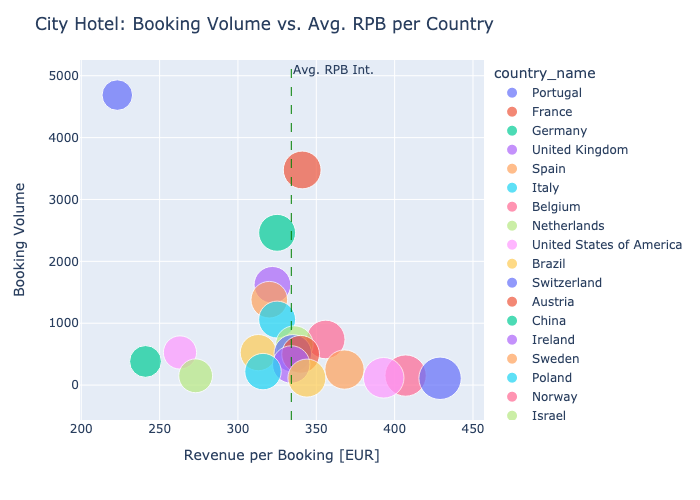

In [54]:
# booking volume vs. avg booking value - CITY

# Step 1: Create the traces of the plots

fig = px.scatter(city_20_all, y="booking", x="booking_value",
                 color='country_name',
                 size='booking_value',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='City Hotel: Booking Volume vs. Avg. RPB per Country')

# axes styling
fig.update_yaxes(title= 'Booking Volume',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'Revenue per Booking [EUR]',ticklen= 5,zeroline= False)   
    


fig.add_vline(x = city_20_all[city_20_all.country_name != "Portugal"].booking_value.mean(),
            line_width=1, line_dash="dash", line_color="green",annotation_text="Avg. RPB Int.", annotation_position="top right")   
    
    
fig.update_layout(coloraxis_showscale=False)
fig.show("png")


In [55]:
resort_20_all[resort_20_all.country_name != "Portugal"].booking_value.mean()

414.45

<b> h) Resort hotel - booking volume vs. avg. RPB  </b>

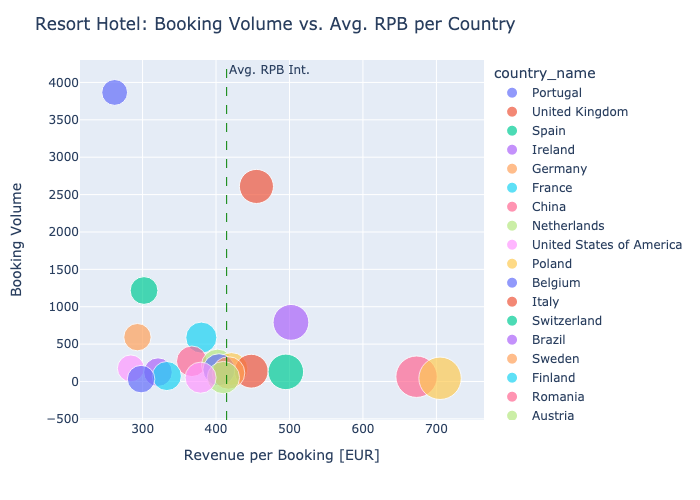

In [56]:
# booking volume vs. avg booking value - RESORT

# Step 1: Create the traces of the plots

fig = px.scatter(resort_20_all, y="booking", x="booking_value",
                 color='country_name',
                 size='booking_value',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='Resort Hotel: Booking Volume vs. Avg. RPB per Country')

# axes styling
fig.update_yaxes(title= 'Booking Volume',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'Revenue per Booking [EUR]',ticklen= 5,zeroline= False)   
    
    


fig.add_vline(x = resort_20_all[resort_20_all.country_name != "Portugal"].booking_value.mean()
, line_width=1, line_dash="dash", line_color="green",
              annotation_text="Avg. RPB Int.", annotation_position="top right")



fig.update_layout(coloraxis_showscale=False)
fig.show("png")


# 9. Customer type

<b> a) Creating customer type variable - single / couple / group / family </b>

In [57]:
# create customer type variable - single / couple / group / family

conditions = [((city_markets['adults'] == 2) & (city_markets['children'] == 0) & (city_markets['babies'] == 0)),
              ((city_markets['adults'] > 2) & (city_markets['children'] == 0) & (city_markets['babies'] == 0)), 
              ((city_markets['adults'] >= 1) & ((city_markets['children'] >= 1) | (city_markets['babies'] >= 1))),
              ((city_markets['adults'] == 1) & (city_markets['children'] == 0) & (city_markets['babies'] == 0))]



conditions2 = [((resort_markets['adults'] == 2) & (resort_markets['children'] == 0) & (resort_markets['babies'] == 0)),
              ((resort_markets['adults'] > 2) & (resort_markets['children'] == 0) & (resort_markets['babies'] == 0)), 
              ((resort_markets['adults'] >= 1) & ((resort_markets['children'] >= 1) | (resort_markets['babies'] >= 1))),
              ((resort_markets['adults'] == 1) & (resort_markets['children'] == 0) & (resort_markets['babies'] == 0))]

values = ["Couple", "Group", "Family", "Single"]

city_markets['customer_type'] = np.select(conditions, values)
resort_markets['customer_type'] = np.select(conditions2, values)

print(city_markets['customer_type'].value_counts())
print(resort_markets['customer_type'].value_counts())


Couple    13141
Single     4062
Group      1420
Family     1344
Name: customer_type, dtype: int64
Couple    8156
Single    2145
Family     856
Group      316
Name: customer_type, dtype: int64


In [58]:
resort_markets["customer"] = resort_markets["customer_origin"] + " - " + resort_markets["customer_type"]
city_markets["customer"] = city_markets["customer_origin"] + " - " + city_markets["customer_type"]


In [59]:
resort_markets.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'country_name', 'continent', 'sub_region',
       'arrival_date_month_num', 'checkin_date', 'length_of_stay',
       'lead_time_days', 'booking_date', 'booking_month_year',
       'booking_weekday', 'month-week', 'checkin_week_year',
       'checkin_month_year', 'booking_value', 'booking', 'customer_origin',
       'customer_type', 'customer'],
      dtype='object')

<b> b) Most frequent customer type within the top 20 countries </b>

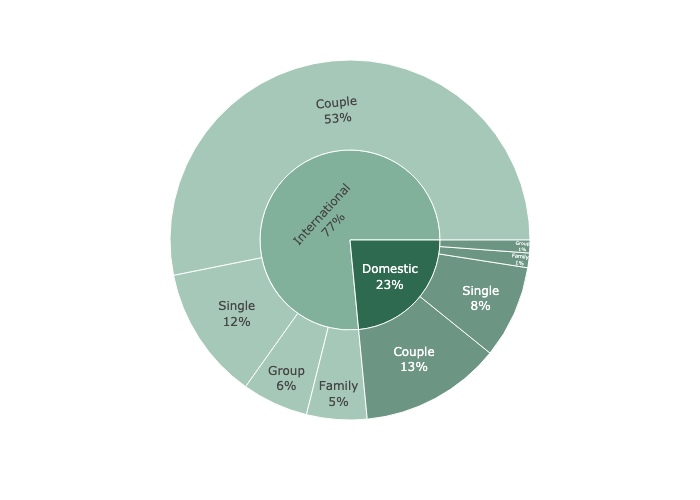

In [60]:
# CUSTOMER TYPE - CITY

df = px.data.tips()
fig = px.sunburst(city_markets, path=['customer_origin', 'customer_type'],
                  values='booking', color='customer_origin',
                    color_discrete_map={'Domestic':'#2d6a4f', 'International':'#81B19B'}
            
                  )
fig.update_traces(textinfo="percent entry + label")
fig.show("png")

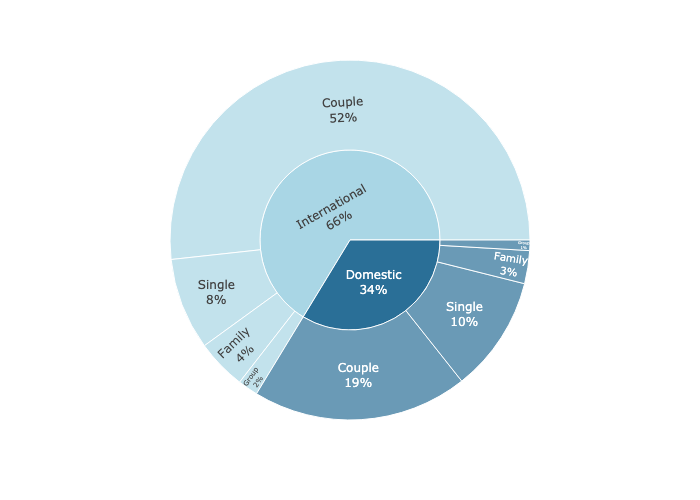

In [61]:
# CUSTOMER TYPE - RESORT

df = px.data.tips()
fig = px.sunburst(resort_markets, path=['customer_origin', 'customer_type'],
                  values='booking', color='customer_origin',
                    color_discrete_map={'Domestic':'#2a6f97', 'International':'#a9d6e5'}
                  )
fig.update_traces(textinfo="percent entry + label")
fig.show("png")

<b> c) Avg. RPB per customer type - city hotel </b>

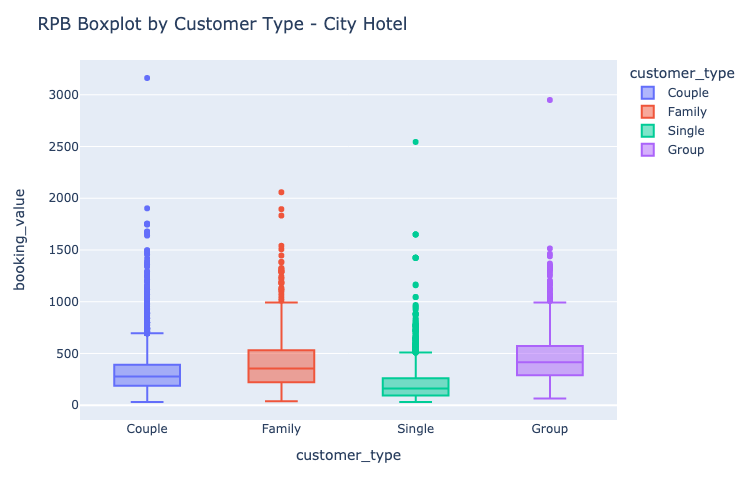

In [62]:
# RPB per customer type - CITY

fig = px.box(city_markets, x="customer_type", y="booking_value", color= "customer_type",
             boxmode="overlay")

fig['layout'].update(height=500, width=750, title='RPB Boxplot by Customer Type - City Hotel')
fig.update_traces(quartilemethod="inclusive")
fig.show("png")

<b> d) Avg. RPB per customer type - resort hotel </b>

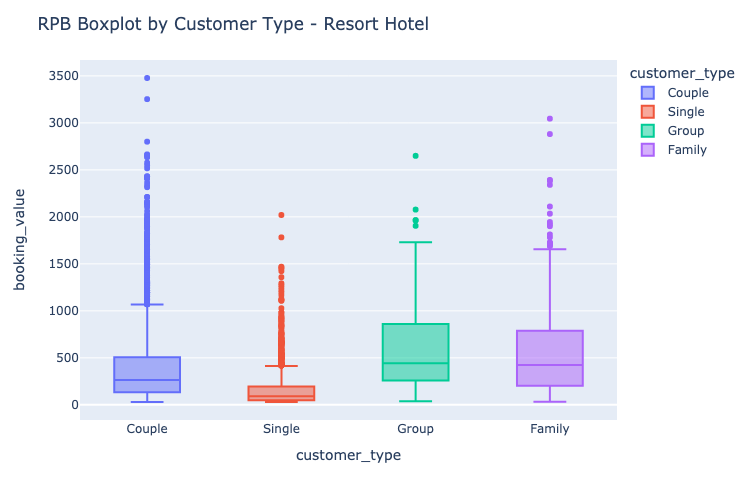

In [63]:
# RPB per customer type - RESORT

fig = px.box(resort_markets, x="customer_type", y="booking_value", color= "customer_type",
             boxmode="overlay")

fig['layout'].update(height=500, width=750, title='RPB Boxplot by Customer Type - Resort Hotel')
fig.update_traces(quartilemethod="inclusive")
fig.show("png")

<b> e) Customer types characteristics overview - city hotel </b>

In [64]:
# looking for the top customer type - CITY

city_type = city_markets.groupby("customer").mean()
city_type = city_type[["booking_value", 'lead_time','length_of_stay']]
#city_type.style.background_gradient(cmap='PuBu')

In [65]:
city_sum = city_markets.groupby("customer").sum()
city_sum = city_sum[['booking','booking_value']]

In [66]:
city_table = pd.concat([city_type,city_sum],axis=1)
city_table.reset_index(level=0, inplace=True)


In [67]:
city_table.columns = ['Customer Type','Avg. RPB','Avg. lead time', "ALOS", "Bookings per year", "Revenue per year"]


In [68]:
city_table["% Bookings"] = (city_table['Bookings per year'] / city_table['Bookings per year'].sum()) * 100
city_table["% Revenue"] = (city_table['Revenue per year'] / city_table['Revenue per year'].sum()) * 100

In [69]:
t2 = city_table.style.background_gradient(axis=0, cmap='PuBu').set_precision(1)
t2

,Customer Type,Avg. RPB,Avg. lead time,ALOS,Bookings per year,Revenue per year,% Bookings,% Revenue
0,Domestic - Couple,237.1,67.6,2.4,2528,599381.4,12.7,9.9
1,Domestic - Family,308.5,46.5,2.4,262,80830.1,1.3,1.3
2,Domestic - Group,419.5,67.6,3.1,231,96912.6,1.2,1.6
3,Domestic - Single,160.5,36.2,1.9,1666,267419.9,8.3,4.4
4,International - Couple,325.4,93.0,3.3,10613,3453414.1,53.2,57.0
5,International - Family,421.2,80.3,3.3,1082,455747.4,5.4,7.5
6,International - Group,460.9,84.7,3.3,1189,547991.1,6.0,9.0
7,International - Single,234.4,66.9,2.4,2396,561725.6,12.0,9.3


<b> f) Customer types characteristics overview - resort hotel </b>

In [70]:
# looking for the top customer type - RESORT

resort_type = resort_markets.groupby("customer").mean()
resort_type = resort_type[["booking_value", 'lead_time','length_of_stay']]
#resort_type.style.background_gradient(cmap='PuBu')

In [71]:
resort_sum = resort_markets.groupby("customer").sum()
resort_sum = resort_sum[['booking','booking_value']]

In [72]:
resort_table = pd.concat([resort_type,resort_sum],axis=1)
resort_table.reset_index(level=0, inplace=True)

In [73]:
resort_table.columns = ['Customer Type','Avg. RPB','Avg. lead time', "ALOS", "Bookings per year", "Revenue per year"]

In [74]:
resort_table["% Bookings"] = (resort_table['Bookings per year'] / resort_table['Bookings per year'].sum()) * 100
resort_table["% Revenue"] = (resort_table['Revenue per year'] / resort_table['Revenue per year'].sum()) * 100

In [75]:
#resort_table.round(0).style.background_gradient(axis=0, cmap='PuBu')

t1 = resort_table.style.background_gradient(axis=0, cmap='PuBu').set_precision(1)

t1

,Customer Type,Avg. RPB,Avg. lead time,ALOS,Bookings per year,Revenue per year,% Bookings,% Revenue
0,Domestic - Couple,291.5,45.7,2.9,2221,647483.7,19.4,15.8
1,Domestic - Family,515.3,68.1,3.5,340,175200.3,3.0,4.3
2,Domestic - Group,645.4,83.1,3.9,108,69703.5,0.9,1.7
3,Domestic - Single,99.3,12.7,1.7,1197,118838.9,10.4,2.9
4,International - Couple,410.9,105.4,5.0,5935,2438607.8,51.7,59.6
5,International - Family,575.0,78.8,4.7,516,296694.7,4.5,7.3
6,International - Group,574.0,112.7,4.9,208,119397.8,1.8,2.9
7,International - Single,238.0,102.0,3.9,948,225633.8,8.3,5.5


#  10. Other observations 

In [76]:
# CITY - MOST FREQUENT COUNTRY - INTERNATIONAL COUPLES
int_couple2 = city_markets[city_markets.customer == "International - Couple"]

int_couple2["country_name"].value_counts()

France                      2580
Germany                     1793
United Kingdom              1181
Spain                        759
Italy                        695
Belgium                      548
Netherlands                  436
Austria                      366
Switzerland                  365
United States of America     350
Brazil                       345
China                        255
Ireland                      248
Sweden                       144
Poland                       139
Israel                       102
Norway                        98
Romania                       76
Finland                       70
Denmark                       63
Name: country_name, dtype: int64

In [77]:
# CITY - MOST FREQUENT MONTH OF ARRIVAL - INTERNATIONAL COUPLES
int_couple2["arrival_date_month"].value_counts().head()

September    1247
August       1112
May          1085
October      1085
April         975
Name: arrival_date_month, dtype: int64

In [78]:
# CITY - MOST FREQUENT DAYWEEK OF BOOKING - INTERNATIONAL COUPLES

int_couple2["booking_weekday"].value_counts().head(3)

Wednesday    1855
Monday       1811
Saturday     1437
Name: booking_weekday, dtype: int64

In [79]:
# RESORT - MOST FREQUENT COUNTRY - INTERNATIONAL COUPLES

int_couple = resort_markets[resort_markets.customer == "International - Couple"]

int_couple["country_name"].value_counts()

United Kingdom              2035
Spain                        967
Ireland                      645
France                       456
Germany                      422
China                        224
Netherlands                  169
United States of America     134
Poland                       129
Belgium                      126
Switzerland                  108
Italy                        104
Brazil                        92
Sweden                        84
Finland                       57
Romania                       51
Austria                       43
Russian Federation            35
Norway                        30
Australia                     24
Name: country_name, dtype: int64

In [80]:
# RESORT - MOST FREQUENT MONTH OF ARRIVAL - INTERNATIONAL COUPLES
int_couple["arrival_date_month"].value_counts().head(3)

May        756
October    704
April      599
Name: arrival_date_month, dtype: int64

In [81]:
# RESORT - MOST FREQUENT DAYWEEK OF BOOKING - INTERNATIONAL COUPLES

int_couple["booking_weekday"].value_counts().head(3)

Wednesday    1180
Monday       1081
Friday       1055
Name: booking_weekday, dtype: int64

In [82]:
# CITY - MOST FREQUENT MONTH OF ARRIVAL - DOMESTIC
dom_couple = city_markets[city_markets.customer == "Domestic - Couple"]
dom_couple["arrival_date_month"].value_counts().head(3)

June     367
April    335
May      306
Name: arrival_date_month, dtype: int64

In [83]:
# RESORT - MOST FREQUENT MONTH OF ARRIVAL - DOMESTIC
dom_couple2 = resort_markets[resort_markets.customer == "Domestic - Couple"]
dom_couple2["arrival_date_month"].value_counts().head(3)

February    289
March       283
April       234
Name: arrival_date_month, dtype: int64